# cuML Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

## Imports

In [1]:
import cudf
import cuml
import numpy as np
import cupy as cp

## Create clustering dataset

<AxesSubplot:xlabel='feat_0', ylabel='feat_1'>

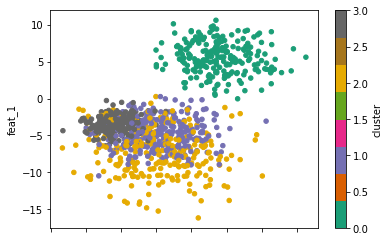

In [2]:
X, y = cuml.make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=[2, 2, 3, 1], random_state=np.random.randint(1e9))

df_clust = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(2)])
df_clust['cluster'] = cudf.Series(y)

df_clust.to_pandas().plot(kind='scatter', x='feat_0', y='feat_1', c='cluster', colormap='Dark2')

In [3]:
X_train, X_test, y_train, y_test = cuml.preprocessing.train_test_split(df_clust, 'cluster', train_size=.8)

---

# Clustering models

---

#### KMeans()

In [4]:
k_means = cuml.KMeans(
    n_clusters=4
    , n_init=3
)

In [5]:
k_means.fit(X_train)

KMeans(handle=<cuml.raft.common.handle.Handle object at 0x7fbbb0729690>, n_clusters=4, max_iter=300, tol=0.0001, verbose=4, random_state=1, init='scalable-k-means++', n_init=3, oversampling_factor=2.0, max_samples_per_batch=32768, output_type='input')

In [6]:
k_means.fit_predict(X_train)

0      3
1      0
2      3
3      1
4      2
      ..
795    1
796    3
797    3
798    1
799    1
Length: 800, dtype: int32

In [7]:
k_means.fit_transform(X_train)

,0,1,2,3
0,11.487393,8.023582,5.831723,1.286406
1,3.460977,12.425099,7.262213,9.032740
2,9.017857,7.867122,3.842571,2.595476
3,16.174551,2.996236,6.188186,5.463123
4,9.284151,7.170538,2.701129,7.046575
...,...,...,...,...
795,14.623061,2.149474,4.232430,7.353314
796,13.453597,4.359181,4.330486,2.616241
797,10.671524,8.692563,5.965519,1.898760
798,20.197147,4.929378,9.815238,9.639963


In [8]:
k_means.predict(X_test)

0      2
1      1
2      2
3      2
4      0
      ..
195    3
196    1
197    0
198    3
199    0
Length: 200, dtype: int32

In [9]:
k_means.score(X_test, y_test)

-1132.3756103515625

In [10]:
k_means.transform(X_test)

,0,1,2,3
0,11.460539,4.339142,1.134777,4.018683
1,14.459068,1.301168,3.871459,6.006001
2,7.792626,8.167660,3.255097,4.357384
3,8.777637,7.096621,2.200681,3.998369
4,2.731019,18.422804,13.255406,14.247242
...,...,...,...,...
195,10.490452,7.509119,4.577238,1.083117
196,13.923056,3.083373,4.022749,3.768722
197,3.742968,18.852360,13.710798,15.197982
198,9.113281,9.638884,6.078754,3.135565


#### DBSCAN()

In [11]:
dbscan = cuml.DBSCAN(
    eps=0.5
    , min_samples=10
)

In [12]:
dbscan.fit(X_train)

DBSCAN(eps=0.5, handle=<cuml.raft.common.handle.Handle object at 0x7fbbb06a4970>, min_samples=10, verbose=4, max_mbytes_per_batch=0, output_type='input', calc_core_sample_indices=True)

In [13]:
dbscan.fit_predict(X_train)

0      0
1     -1
2     -1
3     -1
4     -1
      ..
795   -1
796   -1
797    0
798   -1
799   -1
Length: 800, dtype: int32

---

# Clustering metrics

---

#### metrics.trustworthiness.trustworthiness()

#### metrics.cluster.adjustedradindex.adjusted_rand_score()

In [14]:
cuml.metrics.cluster.adjusted_rand_score(y_test, k_means.predict(X_test))

0.47511118213496184

#### metrics.cluster.entropy.cython_entropy()

In [15]:
cuml.metrics.cluster.entropy(k_means.predict(X_test))

1.2618704664663842

#### metrics.cluster.homogeneity_score.homogeneity_score()

In [16]:
cuml.metrics.cluster.homogeneity_score(y_test.astype('int32'), k_means.predict(X_test).astype('int32'))

0.5491879753537361

#### metrics.cluster.completeness_score.completeness_score()

In [17]:
cuml.metrics.cluster.completeness_score(y_test.astype('int32'), k_means.predict(X_test).astype('int32'))

0.5997961197192605

#### metrics.cluster.mutual_info_score.mutual_info_score()

In [18]:
cuml.metrics.cluster.mutual_info_score(y_test.astype('int32'), k_means.predict(X_test).astype('int32'))

0.7568650093748704